### This notebook will be used for the completion of Data Science Capstone

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
print('Hello Capstone Project Course')

Hello Capstone Project Course


### So, In this part of the Capstone, I will be getting the feel of the dataset I will be working with. I will be including the entire data wrangling in this notebook. A preliminary report detailing ethodologies is also submitted with this notebook

#### The Dataset used is the dataset provided by IBM. Importing the dataset

In [40]:
df=pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\bpver\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [41]:
df.shape

(194673, 38)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [43]:
col_list=df.columns.tolist()
col_list

['SEVERITYCODE',
 'X',
 'Y',
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE.1',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR']

#### I will be removing some columns that I may not require during the wrangling. For now, checking few fields

In [44]:
loc_df=pd.DataFrame(df['LOCATION'].value_counts())
loc_df=loc_df.reset_index()
loc_df.columns=['Locale','Incidents']
loc_df.head(10)

,Locale,Incidents
0,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,276
1,BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...,271
2,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...,265
3,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
4,6TH AVE AND JAMES ST,252
5,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,239
6,ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ...,238
7,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,231
8,WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON...,212
9,ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND...,212


                                              Locale  Incidents
0  BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...        276
1  BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ...        271
2  N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...        265
3     AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST        254
4                               6TH AVE AND JAMES ST        252


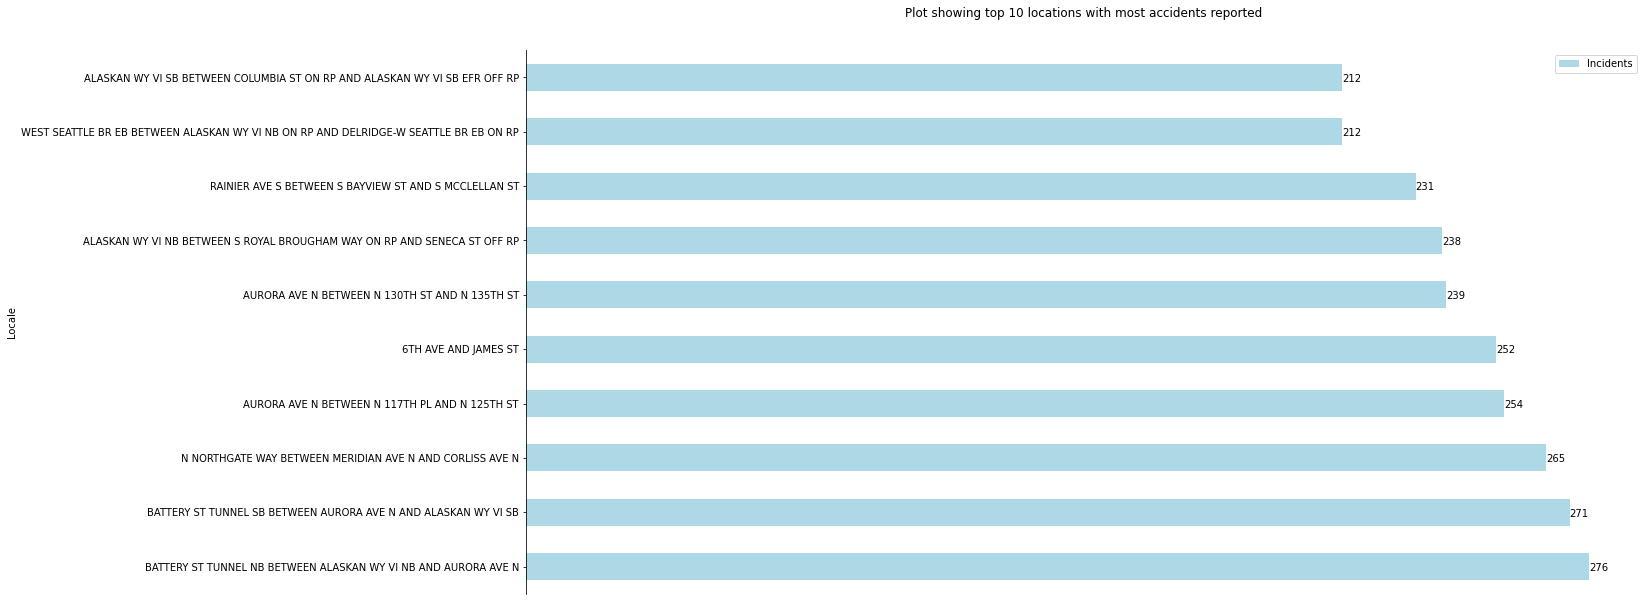

In [79]:
loc_df_top10=loc_df.head(10)
print(loc_df_top10.head())
ax=loc_df_top10.plot(kind='barh',x='Locale',y='Incidents',figsize=(20,10),color='lightblue',width=0.5)
ax.set_title('Plot showing top 10 locations with most accidents reported',y=1.05)

# Removing borders from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Annotating the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()+0.175))
    
# Removing x labels
ax.set_xticks([])

plt.savefig('plot1.pdf')    
plt.show()

In [46]:
weather_df=pd.DataFrame(df['WEATHER'].value_counts())
weather_df=weather_df.reset_index()
weather_df.columns=['Weather','Incidents']
weather_df

,Weather,Incidents
0,Clear,111135
1,Raining,33145
2,Overcast,27714
3,Unknown,15091
4,Snowing,907
5,Other,832
6,Fog/Smog/Smoke,569
7,Sleet/Hail/Freezing Rain,113
8,Blowing Sand/Dirt,56
9,Severe Crosswind,25


    Weather  Incidents
0     Clear     111135
1   Raining      33145
2  Overcast      27714
3   Unknown      15091
4   Snowing        907


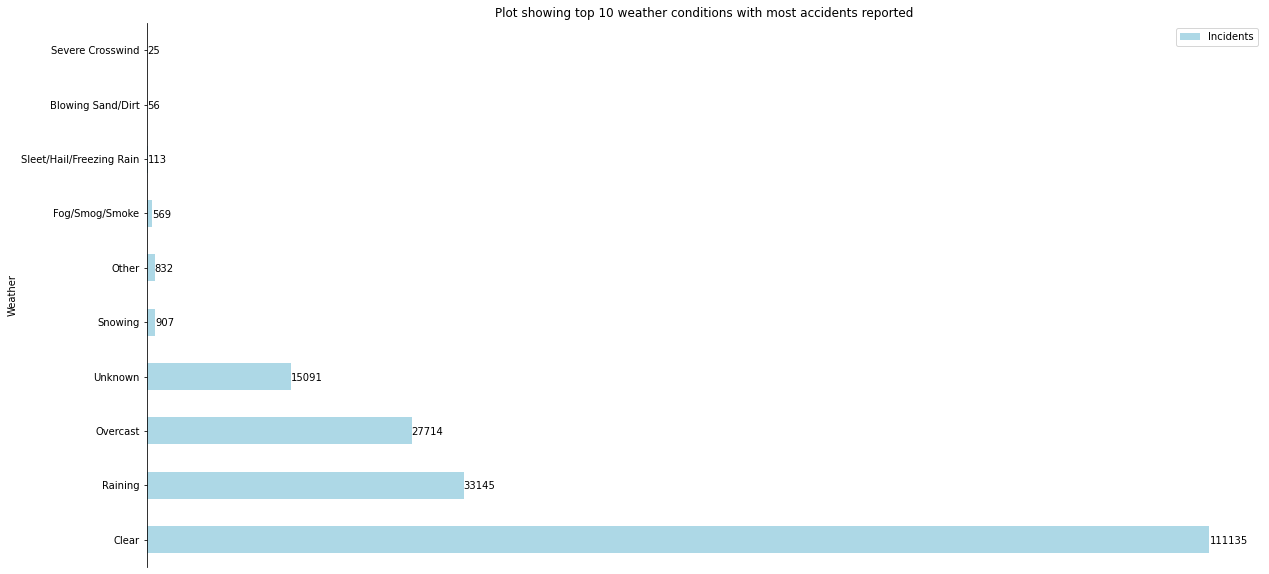

In [47]:
weather_df_top10=weather_df.head(10)
print(weather_df_top10.head())
ax=weather_df_top10.plot(kind='barh',x='Weather',y='Incidents',figsize=(20,10),color='lightblue',width=0.5)
ax.set_title('Plot showing top 10 weather conditions with most accidents reported')

# Removing borders from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Annotating the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()+0.175))
    
# Removing x labels
ax.set_xticks([])
    
plt.show()

In [48]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [49]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [50]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


#### You will notice below that there are quite a few missing data in some columns

In [51]:
# Checking for missing data, true means data is missing
for i in col_list:
    print(df[i].isnull().value_counts())

False    194673
Name: SEVERITYCODE, dtype: int64
False    189339
True       5334
Name: X, dtype: int64
False    189339
True       5334
Name: Y, dtype: int64
False    194673
Name: OBJECTID, dtype: int64
False    194673
Name: INCKEY, dtype: int64
False    194673
Name: COLDETKEY, dtype: int64
False    194673
Name: REPORTNO, dtype: int64
False    194673
Name: STATUS, dtype: int64
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
True     129603
False     65070
Name: INTKEY, dtype: int64
False    191996
True       2677
Name: LOCATION, dtype: int64
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64
False    194673
Name: SEVERITYCODE.1, dtype: int64
False    194673
Name: SEVERITYDESC, dtype: int64
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64
False    194673
Name: PERSONCOUNT, dtype: int64
False    194673
Name: PEDCOUNT, dtype: int64
False    194673
Name: PEDCYLCOUNT, dtype: int64
F

In [52]:
# Creating a function to print whether there are empty columns in a dataframe(not necessary)
def empty_dataframe(data):
    x=data.columns.tolist()
    for i in x:
        print(data[i].isnull().value_counts())

In [53]:
# replace "?" to NaN (just to be on the safe side)
df.replace("?", np.nan, inplace = True)
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [54]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [55]:
df=df.drop(['SEVERITYCODE.1','COLDETKEY','STATUS','INTKEY','INCDTTM','OBJECTID','INCKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','REPORTNO','INCDATE','SEVERITYDESC','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'],axis=1)

In [56]:
df.shape

(194673, 21)

In [57]:
# Checking for missing data, true means data is missing
col_list=df.columns
for i in col_list:
    print(df[i].isnull().value_counts())

False    194673
Name: SEVERITYCODE, dtype: int64
False    189339
True       5334
Name: X, dtype: int64
False    189339
True       5334
Name: Y, dtype: int64
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
False    191996
True       2677
Name: LOCATION, dtype: int64
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64
False    194673
Name: PERSONCOUNT, dtype: int64
False    194673
Name: PEDCOUNT, dtype: int64
False    194673
Name: PEDCYLCOUNT, dtype: int64
False    194673
Name: VEHCOUNT, dtype: int64
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
False    194673
Name: SDOT_COLCODE, dtype: int64
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64
False    189789
True       4884
Name: UNDERINFL, dtype: int64
False    189592
True       5081
Name: WEATHER, dtype: int64
False    189661
True       5012
Name: ROADCOND, dtype: int64
False    189503
True       5170
Name: LIGHTCOND, dtype: int64
True     190006
False      4667
Name: PEDRO

In [58]:
print('List of column labels:',col_list)
df.head()

List of column labels: Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'LOCATION', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR'],
      dtype='object')


,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,...,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,...,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,...,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,...,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,...,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


In [59]:
df_loc=df[['X','Y']]
print(df_loc.shape)
df_loc=df_loc.dropna(subset=["X"], axis=0)
print(df_loc.shape)
df_plot=df_loc.head(100)

sum_x=0
sum_y=0

for i in df_loc['X']:
    sum_x+=i
avg_x=sum_x/len(df_loc)
print(avg_x)

for i in df_loc['Y']:
    sum_y+=i
avg_y=sum_y/len(df_loc)
print(avg_y)

(194673, 2)
(189339, 2)
-122.33051843904114
47.619542517688615


#### We plot 100 points on the plot below to get some visual read of the data(Plotting the entire dataset was )

In [60]:
import folium
from folium import plugins

m=folium.Map(location=[47.7031,-122.3231],zoom_start=12)

incidents=plugins.MarkerCluster().add_to(m)

for lat, lng,label in zip(df_plot.Y, df_plot.X,df.LOCATION):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='red',
        fill=True,
        popup=label,
        fill_color='lightblue',
        fill_opacity=0.6
    ).add_to(incidents)
    
m

In [61]:
# We will simply remove all rows with missing values of the coordinates
print('Shape before removing missing coordinates:',df.shape)
df=df.dropna(subset=['X'],axis=0)
print('Shape after removing missing coordinates',df.shape)

Shape before removing missing coordinates: (194673, 21)
Shape after removing missing coordinates (189339, 21)


#### Well, there are still 189k rows remaining, roughly 96% of the original data after removing rows with missing coordinates, still a big enough dataset to get an accurate prediction

In [62]:
col_list=df.columns
for i in col_list:
    print(df[i].isnull().value_counts())

False    189339
Name: SEVERITYCODE, dtype: int64
False    189339
Name: X, dtype: int64
False    189339
Name: Y, dtype: int64
False    189339
Name: ADDRTYPE, dtype: int64
False    189339
Name: LOCATION, dtype: int64
False    184582
True       4757
Name: COLLISIONTYPE, dtype: int64
False    189339
Name: PERSONCOUNT, dtype: int64
False    189339
Name: PEDCOUNT, dtype: int64
False    189339
Name: PEDCYLCOUNT, dtype: int64
False    189339
Name: VEHCOUNT, dtype: int64
False    185146
True       4193
Name: JUNCTIONTYPE, dtype: int64
False    189339
Name: SDOT_COLCODE, dtype: int64
True     160163
False     29176
Name: INATTENTIONIND, dtype: int64
False    184602
True       4737
Name: UNDERINFL, dtype: int64
False    184414
True       4925
Name: WEATHER, dtype: int64
False    184481
True       4858
Name: ROADCOND, dtype: int64
False    184327
True       5012
Name: LIGHTCOND, dtype: int64
True     184694
False      4645
Name: PEDROWNOTGRNT, dtype: int64
True     180619
False      8720
Name: SPE

In [63]:
df['SPEEDING'].value_counts()

Y    8720
Name: SPEEDING, dtype: int64

In [64]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,...,11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,...,16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,...,14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,...,11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,...,11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


In [65]:
df=df.drop(['ST_COLCODE','SDOT_COLCODE'
           ],axis=1)
print(df.columns)
print(df.shape)

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'LOCATION', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')
(189339, 19)


In [66]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189339 entries, 0 to 194672
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    189339 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   ADDRTYPE        189339 non-null  object 
 4   LOCATION        189339 non-null  object 
 5   COLLISIONTYPE   184582 non-null  object 
 6   PERSONCOUNT     189339 non-null  int64  
 7   PEDCOUNT        189339 non-null  int64  
 8   PEDCYLCOUNT     189339 non-null  int64  
 9   VEHCOUNT        189339 non-null  int64  
 10  JUNCTIONTYPE    185146 non-null  object 
 11  INATTENTIONIND  29176 non-null   object 
 12  UNDERINFL       184602 non-null  object 
 13  WEATHER         184414 non-null  object 
 14  ROADCOND        184481 non-null  object 
 15  LIGHTCOND       184327 non-null  object 
 16  PEDROWNOTGRNT   4645 non-null    object 
 17  SPEEDING  

In [67]:
col_list=df.columns
for i in col_list:
    if(df[i].isna().sum()>0):
        print(df[i].value_counts())

Parked Car    46381
Angles        34460
Rear Ended    32968
Other         22277
Sideswipe     18034
Left Turn     13624
Pedestrian     6551
Cycles         5378
Right Turn     2912
Head On        1997
Name: COLLISIONTYPE, dtype: int64
Mid-Block (not related to intersection)              87390
At Intersection (intersection related)               62491
Mid-Block (but intersection related)                 22465
Driveway Junction                                    10580
At Intersection (but not related to intersection)     2071
Ramp Junction                                          143
Unknown                                                  6
Name: JUNCTIONTYPE, dtype: int64
Y    29176
Name: INATTENTIONIND, dtype: int64
N    97639
0    78082
Y     5002
1     3879
Name: UNDERINFL, dtype: int64
Clear                       108959
Raining                      32015
Overcast                     27136
Unknown                      13893
Snowing                        894
Other                    

In [68]:
# Printing list of columns with Nan values 
for i in col_list:
    if(df[i].isna().sum()>0):
        print(i)        

COLLISIONTYPE
JUNCTIONTYPE
INATTENTIONIND
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
PEDROWNOTGRNT
SPEEDING


In [69]:
# Replacing Nan values with appropriate values
df['COLLISIONTYPE'].replace(np.nan,'Unknown',inplace=True)
df['COLLISIONTYPE'].replace('Other','Unknown',inplace=True)
df['JUNCTIONTYPE'].replace(np.nan,'Unknown',inplace=True)
df['INATTENTIONIND'].replace(np.nan,'N',inplace=True)
df['UNDERINFL'].replace(np.nan,'N',inplace=True)
df['UNDERINFL'].replace('0','N',inplace=True)
df['UNDERINFL'].replace('1','Y',inplace=True)
df['WEATHER'].replace(np.nan,'Unknown',inplace=True)
df['WEATHER'].replace('Other','Unknown',inplace=True)
df['ROADCOND'].replace(np.nan,'Unknown',inplace=True)
df['LIGHTCOND'].replace(np.nan,'Unknown',inplace=True)
df['LIGHTCOND'].replace('Other','Unknown',inplace=True)
df['PEDROWNOTGRNT'].replace(np.nan,'N',inplace=True)
df['SPEEDING'].replace(np.nan,'N',inplace=True)

In [70]:
count=0
for i in col_list:
    if(df[i].isna().sum()>0):
        count+=1
print(count)

0


In [71]:
for i in col_list:
    print(df[i].value_counts())

1    132221
2     57118
Name: SEVERITYCODE, dtype: int64
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64
47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64
Block           124591
Intersection     64748
Name: ADDRTYPE, dtype: int64
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N           265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                     254
6TH AVE AND JAMES ST                                               252
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                     239
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST              231
                                           

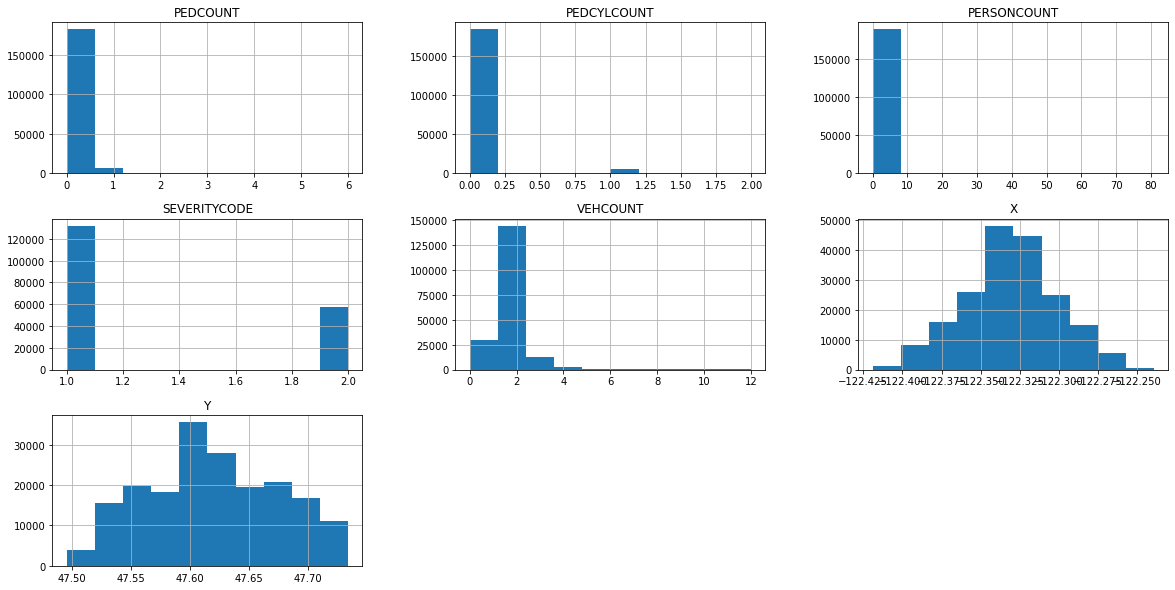

In [72]:
df.hist(figsize=(20,10))
plt.show()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189339 entries, 0 to 194672
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    189339 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   ADDRTYPE        189339 non-null  object 
 4   LOCATION        189339 non-null  object 
 5   COLLISIONTYPE   189339 non-null  object 
 6   PERSONCOUNT     189339 non-null  int64  
 7   PEDCOUNT        189339 non-null  int64  
 8   PEDCYLCOUNT     189339 non-null  int64  
 9   VEHCOUNT        189339 non-null  int64  
 10  JUNCTIONTYPE    189339 non-null  object 
 11  INATTENTIONIND  189339 non-null  object 
 12  UNDERINFL       189339 non-null  object 
 13  WEATHER         189339 non-null  object 
 14  ROADCOND        189339 non-null  object 
 15  LIGHTCOND       189339 non-null  object 
 16  PEDROWNOTGRNT   189339 non-null  object 
 17  SPEEDING  

##### As you can see we have cleaned the data and removed/replaced the missing data fields.Now we save the data above as a new csv for further visualization and modelling 

In [74]:
df.to_csv('updated_project.csv')